1.Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика

In [52]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Стандартизация

In [53]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [54]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


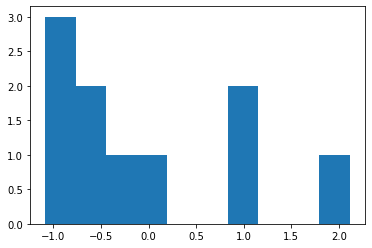

In [55]:
ind = 2
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [56]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

График зависимости весов всех признаков от lambda в самописной L2-регуляризации

In [57]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * dQ + dReg
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [58]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

array([56.21890547,  6.23067176, -0.16461018,  6.42091023])

In [59]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

10it [00:02,  4.19it/s]


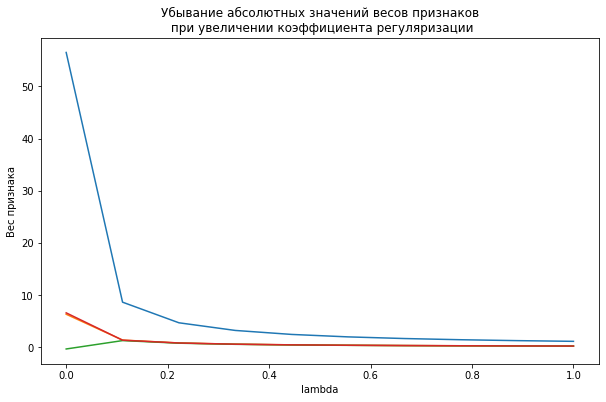

In [60]:
n = 10

coeffs = np.zeros((n, X_st.shape[1]))
lambda_list = np.linspace(0, 1, n)

for i, val in tqdm(enumerate(lambda_list)):
    weights = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    coeffs[i, :] = weights


plt.figure(figsize=(10, 6))
for i in range(X_st.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])

    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

Вывод - с увеличением коэффициэнта регуляризации веса становяться меньше.


2.Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [65]:
#W / np.abs(W)
#+1 / 1 = +
#-1 / 1 = -
#0 / 0 = nan

In [62]:
np.sign(0)

0

In [63]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [64]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [-0.24304518 -0.62851776  0.39375758  0.12105688], error 3530.7014823187906
Iter: 500, weights: [56.2167044   5.83611734  1.29197595  5.30710938], error 25.454474131665986
Iter: 1000, weights: [56.21890539  6.12477267  0.32482792  6.02123526], error 25.066130390161668
Iter: 1500, weights: [5.62189055e+01 6.19584957e+00 2.43881017e-03 6.28323851e+00], error 25.00712726747157
Iter: 2000, weights: [56.21890547  6.21883284 -0.10750741  6.37378817], error 24.995328364902914
Iter: 2500, weights: [56.21890547  6.2266355  -0.14512699  6.40482943], error 24.99227113273858
Iter: 3000, weights: [56.21890547  6.22930356 -0.15800509  6.41545845], error 24.991339494486105
Iter: 3500, weights: [56.21890547  6.23021681 -0.16241387  6.41909741], error 24.991034021674263
Iter: 4000, weights: [56.21890547  6.23052946 -0.16392322  6.42034322], error 24.990931021754633
Iter: 4500, weights: [56.21890547  6.23063649 -0.16443995  6.42076972], error 24.99089594467508
Final MSE: 24.99088395768

array([56.21890547,  6.2306731 , -0.16461665,  6.42091557])

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [66]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [67]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [68]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [69]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [70]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [71]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

Вывод - последняя операция полностью стирает предыдущую.

4. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [ ]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

In [73]:
X = standard_scale(X)

In [74]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, Y, iterations, eta=1e-4, size=1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [77]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [76]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 28273.082577173664
Iter: 500, error 3777.783523237347
Iter: 1000, error 523.9841505461728
Iter: 1500, error 91.45089435114762
Iter: 2000, error 33.910760109943865
Iter: 2500, error 26.250445797925806
Iter: 3000, error 25.229863169553205
Iter: 3500, error 25.093788617760474
Iter: 4000, error 25.075632044484834
Iter: 4500, error 25.07320755700852
Final MSE: 25.07288356394624
CPU times: user 1min 3s, sys: 25.1 s, total: 1min 28s
Wall time: 45.6 s


In [78]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 27744.728544215483
Iter: 500, error 3368.5430672732723
Iter: 1000, error 572.2807837049544
Iter: 1500, error 110.6890938947377
Iter: 2000, error 41.79831986296467
Iter: 2500, error 27.962046555606424
Iter: 3000, error 26.34637266574447
Iter: 3500, error 25.63342400764663
Iter: 4000, error 25.352515476998224
Iter: 4500, error 25.547940572923004
Final MSE: 25.291571745440745
CPU times: user 13.6 s, sys: 4.62 s, total: 18.3 s
Wall time: 9.44 s


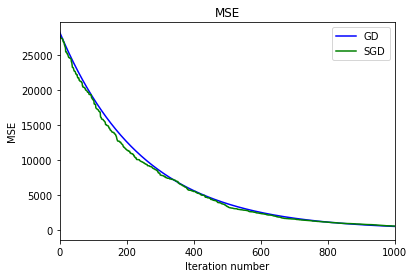

In [79]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [80]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

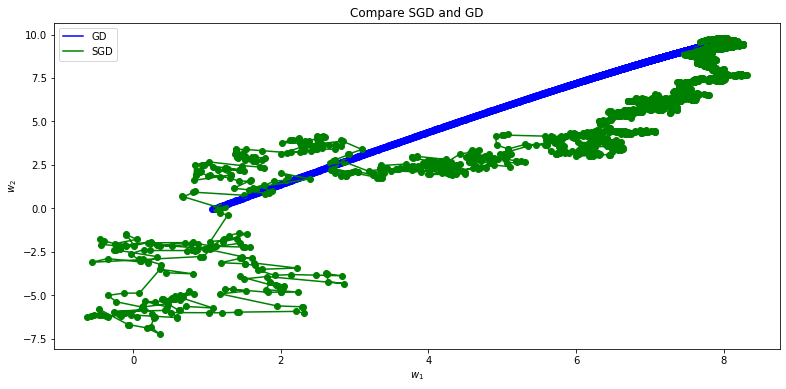

In [81]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()